<a href="https://colab.research.google.com/github/PhilChenn/Computer-Vision/blob/main/homework04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 527 Homework 4

### Problem 0 (3 points)

## Part 1: The Soft-Max

### Problem 1.1 (Exam Style)

The output of a softmax function satisfies that


\begin{cases}
p_1 + p_2 + p_3 = 1 \\
p_1 > 0, p_2 > 0, p_3 > 0
\end{cases}


The equation is a plane in $\mathbb{R}^3$ and the three inequality constraints represent the first octant (+,+,+) in $\mathbb{R}^3$.

The polygon P is the intersection of these two objects, which is a triangular 2-simplex.

The vertices of P in $\mathbb{R}^3$ is:

$A(1,0,0)$

$B(0,1,0)$

$C(0,0,1)$


### Problem 1.2 (Exam Style)

since $ \hat{y} = arg max_{k\in\{1,2,3\}} p_k$, 

$\hat{y} = 1$ when $p_1 = max\{p_1,p_2,p_3\}$,

$\hat{y} = 2$ when $p_2 = max\{p_1,p_2,p_3\}$,

$\hat{y} = 3$ when $p_3 = max\{p_1,p_2,p_3\}$.

Take the first decision region where $\hat{y} = 1$ for example, $p_k$ satisfies that 
\begin{cases}
p_1 + p_2 + p_3 = 1 \\
p_1 > p_2 > 0 \\
p_1 > p_3 > 0
\end{cases}
The solution to the constraints is a quadrilateral with the following vertices 

$(\frac{1}{2},0,\frac{1}{2}), (1,0,0), (\frac{1}{2},\frac{1}{2},0), (\frac{1}{3},\frac{1}{3},\frac{1}{3}） $ 

Similarly, the vertices for the second decision region are 

$(\frac{1}{2},\frac{1}{2},0), (0,1,0), (0,\frac{1}{2},\frac{1}{2}), (\frac{1}{3},\frac{1}{3},\frac{1}{3}） $ 

The vertices for the third decision region are 

$(\frac{1}{2},0,\frac{1}{2}), (0,0,1), (0,\frac{1}{2},\frac{1}{2}), (\frac{1}{3},\frac{1}{3},\frac{1}{3}） $ 

## Part 2: Loss and Soft-Max 

### Problem 2.1 (Exam Style)

Similar to problem 1, the output of a softmax function satisfies that

\begin{cases}
p_1 + p_2 = 1 \\
p_1 > 0, p_2 > 0
\end{cases}

The quadratic loss is defined as 
$
\ell_q(y,p) = \frac{1}{2}||q(y) - p||^2,$ where $p=(p_0,p_1).
$

When $y=0$, we have $q(y)=(1,0)$, therefore
$
\ell_q(y,p) = \frac{1}{2}||(1,0) - (p_0,p_1)||^2 \\
= \frac{(1-p_0)^2 + p_1^2}{2} \\
= \frac{(1-p_0)^2 + (1-p_0)^2}{2} \\
= (1-p_0)^2
$

When $y=1$, we have $q(y)=(0,1)$, therefore
$
\ell_q(y,p) = \frac{1}{2}||(0,1) - (p_0,p_1)||^2 \\
= \frac{p_0^2 + (1-p_1)^2}{2} \\
= \frac{(1-p_1)^2 + (1-p_1)^2}{2} \\
= (1-p_1)^2
$

Since y is only defined over 0 and 1, we can conclude that 
$
\ell_q(y,p) = (1-p_y)^2.
$

### Problem 2.2 (Exam Style)

$
(p_0,p_1) = \sigma(z) \\
= (\sigma(z_0),\sigma(z_1)) \\
= (\frac{e^{z_0}}{e^{z_0}+e^{z_1}},\frac{e^{z_1}}{e^{z_0}+e^{z_1}})
$

That is, 

$
p_0 = \frac{e^{z_0}}{e^{z_0}+e^{z_1}} \\
= \frac{1}{1+\frac{e^{z_1}}{e^{z_0}}} \\
= \frac{1}{1+e^{z_1-z_0}} \\
= \frac{1}{1+e^{-d}}
$

We have shown that $p_0$ depends exclusively on $d$ and not on $z_0$ and $z_1$ separately. Therefore, the output of the soft-max function $\sigma(z)$ depends only on $d = z_0 - z_1$.

### Problem 2.3

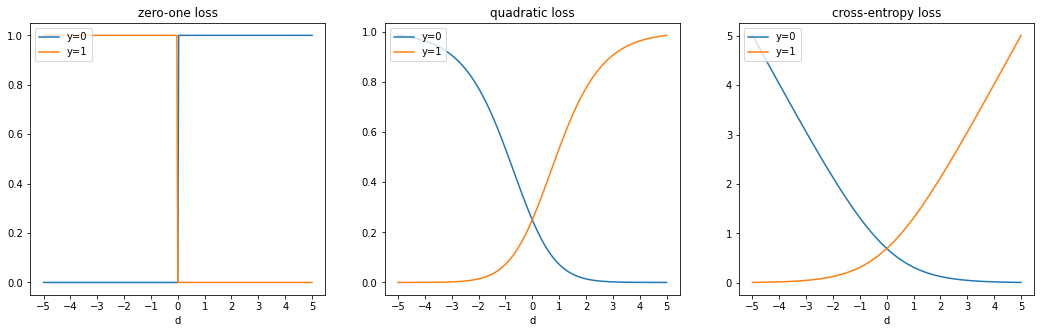

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

d = np.linspace(-5., 5., 301)
# p_0 = np.exp(d) / (np.exp(d)+1)
# p_1 = 1 / (np.exp(d)+1)

# y=0
L_01 = np.heaviside(d,0) # = 1 if d>0 else 0
L_q = 1/np.square(np.exp(d)+1)
L_xe = np.log(np.exp(d)+1) - d #-np.log(np.exp(d) / (np.exp(d)+1))
L0 = [L_01, L_q, L_xe]

# y=1
L_01 = np.heaviside(-d,0) # = 1 if d<0 else 0
L_q = np.square(np.exp(d) / (np.exp(d)+1))
L_xe = np.log(np.exp(d)+1) #-np.log(1 / (np.exp(d)+1))
L1 = [L_01, L_q, L_xe]

label = ['zero-one loss', 'quadratic loss', 'cross-entropy loss']
plt.figure(figsize=(18, 5))
for j in [1,2,3]:
  
  plt.subplot(1, 3, j)
  plt.xticks(np.linspace(-5, 5, 11))
  axes = plt.gca()
  axes.set_xlabel('d')
  plt.plot(d, L0[j-1], label="y=0")
  plt.plot(d, L1[j-1], label="y=1")
  plt.legend(loc='upper left')
  plt.title(label[j-1])
  
plt.show()
  

### Problem 2.4 (Exam Style)

The cross entropy loss function is convex.

A strictly convex function has a single global minimum. In optimization problems, we use gradient descent algorithm to search for minimum. When we reached a local minimum, it is also the global minimum. Non-convex functions do not possess such properties, but that is not a big issue for neural networks.

When training a neural network, the global minimum is usually not found after the optimization steps in deep learning. 
Also due to overfitting concerns, we tend to avoid the overspecialization of the neural network to a global minimum, which might be the ultimate specialization to the training set.

In a word, it is fine to stick in a local minimum with non-convex loss functions when training neural networks. Therefore, convexity of the composition of soft-max and loss does not help much when training a neural network.


***Phil's answer***

The neural network(cascade of fully-connected layers) itself is non-convex due to the use of non-linear activation function. Even if we impose convex composition(soft-max and cross-entropy loss) at the output of neural network, it still doesn't make it convex. As a result, the convexity of the composition of soft-max and loss won't help much with training.

## Part 3: Back-Propagation 

### Problem 3.1 (Exam Style)

$
\hat{y}=1
$

### Problem 3.2 (Exam Style)

The output of the network 

$
\hat{y} = ReLU(a_3) \\
= ReLU(w_7y_1 + w_8y_2 +w_9) \\
= ReLU(w_7ReLU(a_1) + w_8ReLU(a_2) +w_9) \\
= ReLU(w_7ReLU(w_1x_1+w_2x_2+w_3) + w_8ReLU(w_4x_1+w_5x_2+w_6) +w_9) 
$

Given the input $x_1=1,x_2=1$, we can simplify $\hat{y}$ as

$
\hat{y} = ReLU(w_7ReLU(w_1+w_2+w_3) + w_8ReLU(w_4+w_5+w_6) + w_9)
$

since $\frac{d{ReLU(w)}}{d{w}}=sgn(ReLU(w)),$

$
g = \frac{\partial{\hat{y}}}{\partial{w}} \\
=
\begin{bmatrix}
\frac{\partial{\hat{y}}}{\partial{w_1}} & 
\frac{\partial{\hat{y}}}{\partial{w_2}} &
\frac{\partial{\hat{y}}}{\partial{w_3}} &
\frac{\partial{\hat{y}}}{\partial{w_4}} &
\frac{\partial{\hat{y}}}{\partial{w_5}} &
\frac{\partial{\hat{y}}}{\partial{w_6}} &
\frac{\partial{\hat{y}}}{\partial{w_7}} &
\frac{\partial{\hat{y}}}{\partial{w_8}} &
\frac{\partial{\hat{y}}}{\partial{w_9}} \\
\end{bmatrix}
=
\begin{bmatrix}
sgn(ReLU(w_1-1)) & 
sgn(ReLU(w_2+2)) &
sgn(ReLU(w_3+1)) &
sgn(ReLU(w_4-2)) &
sgn(ReLU(w_5-1)) &
sgn(ReLU(w_6+1)) &
sgn(ReLU(w_7)) &
0 &
sgn(ReLU(w_9)) \\
\end{bmatrix}
=
\begin{bmatrix}
1 & 
1 &
1 &
0 &
0 &
0 &
1 &
0 &
0 \\
\end{bmatrix}
$


## Part 4: Experiments with a Small Neural Network

In [ ]:
import urllib.request
import pickle
from os import path as osp


pickle_file_name = 'data.pkl'
if not osp.exists(pickle_file_name):
    url = 'https://www2.cs.duke.edu/courses/spring21/compsci527/homework/4/data.pkl'
    urllib.request.urlretrieve(url, pickle_file_name)
with open(pickle_file_name, 'rb') as file:
    data_sets = pickle.load(file)

In [ ]:
import numpy as np


def make_data_space(data):
    x = np.vstack([data[data_set]['x'] for data_set in data])
    tx = data['test']['x']
    space = {'left': np.min(x[:, 0]), 'right': np.max(x[:, 0]),
             'bottom': np.min(x[:, 1]), 'top': np.max(x[:, 1]),
             'pitch': tx[1, 1] - tx[0, 1]}
    return space


def make_patches(centers, color, side):
    shift = -side / 2.
    patches = [Rectangle(center + shift, side, side) for center in centers]
    return PatchCollection(patches, fc=color, lw=0.)

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
%matplotlib inline


def plot_data(data, space, title):
    data_left, data_right = space['left'], space['right']
    data_bottom, data_top = space['bottom'], space['top']
    pitch = space['pitch']
    half_pitch = pitch / 2.
    left, right = data_left - half_pitch, data_right + half_pitch
    bottom, top = data_bottom - half_pitch, data_top + half_pitch
    aspect_ratio = (top - bottom) / (right - left)
    width, title_height = 6., 0.25
    axes_height = width * aspect_ratio
    figure_height = axes_height + title_height
    side = 0.75 * pitch
    x, y = data['x'], data['y']
    plt.figure(figsize=(width, figure_height))
    ax = plt.gca()
    axes_height_fraction = axes_height / figure_height
    ax.set_position((0., 0., 1., axes_height_fraction))
    ax.set_xlim(left, right)
    ax.set_ylim(bottom, top)
    positive = make_patches(x[y, :], 'g', side)
    negative = make_patches(x[~y, :], 'r', side)
    ax.add_collection(positive)
    ax.add_collection(negative)
    plt.axis('off')
    plt.title(title, fontsize=24)
    plt.show()
    plt.close()

In [ ]:
from sklearn.neural_network import MLPClassifier as Network
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning


@ignore_warnings(category=ConvergenceWarning)
def train_network(hidden_layer_sizes, options, data):
    net = Network(hidden_layer_sizes=hidden_layer_sizes,
                  solver='sgd',
                  batch_size=options['mini batch size'],
                  learning_rate=options['learning rate schedule'],
                  learning_rate_init=options['initial learning rate'],
                  power_t=options['learning rate exponent'],
                  max_iter=options['max epochs'],
                  momentum=options['momentum'],
                  validation_fraction=0.,
                  n_iter_no_change=options['max epochs'],
                  alpha=0.,
                  tol=0.,
                  verbose=options['verbose']
                  )
    net.fit(data['x'], data['y'])
    risk = net.loss_curve_

    return net, risk

In [ ]:
def experiment(architecture, training_options, data, runs=1, plot_predictions=None):
    if plot_predictions is None:
        plot_predictions = runs == 1

    accuracy, accuracies, risk_plots = 0., [], []
    print('Run', end=' ')
    for run in range(runs):
        print(run, end=' ')
        nn, risk_plot = train_network(architecture, training_options, data['train'])
        y_hat = nn.predict(data['test']['x'])
        accuracy = nn.score(data['test']['x'], data['test']['y'])
        accuracies.append(accuracy)
        risk_plots.append(risk_plot)
        if plot_predictions:
            predictions = {'x': data['test']['x'], 'y': y_hat}
            plot_data(predictions, data_space,
                      title='run {}, accuracy {:.2f} percent'.format(run, accuracy * 100.))
    print()

    plt.figure()
    for run, plot in enumerate(risk_plots):
        plt.plot(plot, label='run {}'.format(run))
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('training risk')
    plt.show()
    plt.close()

    if runs == 1:
        qualifier = ''
    else:
        accuracy = np.median(accuracies)
        qualifier = 'median '
    print('{}accuracy {:.2f} percent'.format(qualifier, accuracy * 100.))

### Problem 4.1 (Exam Style)

### Problem 4.2

In [ ]:
bad_architecture = (2, 2)

bad_training_options = {
    'mini batch size': 10,
    'learning rate schedule': 'constant',
    'initial learning rate': 0.0001,
    'learning rate exponent': None,
    'max epochs': 2000,
    'momentum': 0.,
    'verbose': False
}

# experiment(bad_architecture, bad_training_options, data_sets,
#            runs=3, plot_predictions=True)

In [ ]:
better_architecture = (2, 2)

better_training_options = {
    'mini batch size': 10,
    'learning rate schedule': 'constant',
    'initial learning rate': 0.0001,
    'learning rate exponent': None,
    'max epochs': 2000,
    'momentum': 0.,
    'verbose': False
}
# experiment(better_architecture, better_training_options, data_sets,
#            runs=10, plot_predictions=False)